Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [42]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

enrollments = read_csv('lesson2/enrollments.csv')


print (enrollments[0])

{u'status': u'canceled', u'is_udacity': u'True', u'is_canceled': u'True', u'join_date': u'2014-11-10', u'account_key': u'448', u'cancel_date': u'2015-01-14', u'days_to_cancel': u'65'}


In [43]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

daily_engagement = read_csv('lesson2/daily_engagement.csv')
project_submissions = read_csv('lesson2/project_submissions.csv')
print(daily_engagement[0])
print(project_submissions [0])

{u'lessons_completed': u'0.0', u'num_courses_visited': u'1.0', u'total_minutes_visited': u'11.6793745', u'projects_completed': u'0.0', u'acct': u'0', u'utc_date': u'2015-01-09'}
{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': u'2015-01-16', u'creation_date': u'2015-01-14'}


## Fixing Data Types

In [44]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [45]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [46]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

## Problems in the Data

In [50]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
for i in daily_engagement:  
    i['account_key'] = i['acct']
    del(i['acct'])
    


KeyError: 'acct'

In [51]:
daily_engagement[0]['account_key']

u'0'

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [49]:
#####################################
#                 2                 #
#####################################
def get_unique_students(data):
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['account_key'])
    return unique_students


# enrollment_num_rows = len(enrollments)       
# enrollments_list  = set()
# for i in enrollments:
#     enrollments_list.add(i['account_key'])
# enrollment_num_unique_students = len(enrollments_list)

# engagement_num_rows =  len(daily_engagement)            
# engagement_list  = set()
# for i in daily_engagement:
#     engagement_list.add(i['acct'])
# engagement_num_unique_students = len(engagement_list)

# submission_num_rows =  len(project_submissions)            
# submission_list  = set()
# for i in project_submissions:
#     submission_list.add(i['account_key'])
# submission_num_unique_students = len(submission_list)



743

In [52]:
len(enrollments)
unique_enrolled_students = get_unique_students(enrollments)
len(unique_enrolled_students)

1302

In [53]:
len(daily_engagement)
unique_engagement_students = get_unique_students(daily_engagement)
len(unique_engagement_students)

1237

In [54]:
len(project_submissions)
unique_project_submitters = get_unique_students(project_submissions)
len(unique_project_submitters)

743

## Missing Engagement Records

In [61]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

for i in enrollments:
    if i['account_key'] not in unique_engagement_students:
        print(i)
        break
        

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}


## Checking for More Problem Records

In [66]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.
count = 0
for i in enrollments:
    if i['account_key'] not in unique_engagement_students and i['days_to_cancel']!=0:
        count+=1
        print i
print(count)

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}
3


## Tracking Down the Remaining Problems

In [67]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [68]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [69]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## Refining the Question

In [85]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}

for i in non_udacity_enrollments:
    if i['days_to_cancel']==None or i['days_to_cancel']>7:
        if i['account_key'] not in paid_students or i['join_date'] >paid_students[i['account_key']]:
            ##paid_students.update({i['account_key']:i['join_date']})
            paid_students[i['account_key']] = i['join_date']

print(len(paid_students))

995


## Getting Data from First Week

In [165]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days>=0

In [166]:
def remove_free_trial_cancels(data):
    new_data = []
    for i in data:
        if i['account_key'] in paid_students:
            new_data.append(i)
    return new_data

In [209]:
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print paid_submissions[0]


{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': datetime.datetime(2015, 1, 16, 0, 0), u'creation_date': datetime.datetime(2015, 1, 14, 0, 0)}


In [198]:
## Adding has_visited fied (1 or 0) indicating if student visitec classrom or not on any specific day
for i in paid_engagement:
    if i['num_courses_visited']>0:
        i['has_visited'] = 1
    else:
        i['has_visited'] = 0

In [190]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the lpaid students you just found, and the date is within
## one week of the student's join date.
paid_engagement_in_first_week = []
for i in paid_engagement:
    account_key =  i['account_key']
    join_date = paid_students[account_key]
    engagement_date = i['utc_date']
    if within_one_week(join_date, engagement_date):
        paid_engagement_in_first_week.append(i)



## Exploring Student Engagement

In [191]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

engagement_by_account = group_data(paid_engagement_in_first_week,
                                   'account_key')


In [192]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)

def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

total_minutes_by_account = sum_grouped_items(engagement_by_account,
                                             'total_minutes_visited')


Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933


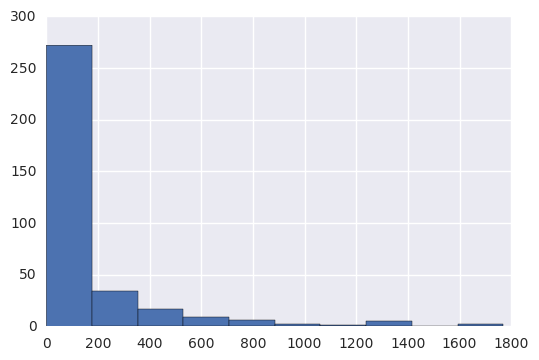

In [286]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Summarize the data about minutes spent in the classroom
def describe_data(data):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)
    plt.hist(data)

describe_data(total_minutes_by_account.values())

## Debugging Data Analysis Code

In [259]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.
student_with_max_minutes = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
     if total_minutes>max_minutes:
            max_minutes = total_minutes
            student_with_max_minutes = student
    
max_minutes

1768.5227493319999

In [260]:
for i in paid_engagement_in_first_week:
    if i['account_key'] == student_with_max_minutes:
        print i

{u'lessons_completed': 0, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 157.604542833, u'projects_completed': 0, 'account_key': u'1060', u'utc_date': datetime.datetime(2015, 1, 11, 0, 0)}
{u'lessons_completed': 0, u'num_courses_visited': 2, 'has_visited': 1, u'total_minutes_visited': 341.673267, u'projects_completed': 0, 'account_key': u'1060', u'utc_date': datetime.datetime(2015, 1, 12, 0, 0)}
{u'lessons_completed': 0, u'num_courses_visited': 2, 'has_visited': 1, u'total_minutes_visited': 224.766829167, u'projects_completed': 0, 'account_key': u'1060', u'utc_date': datetime.datetime(2015, 1, 13, 0, 0)}
{u'lessons_completed': 0, u'num_courses_visited': 2, 'has_visited': 1, u'total_minutes_visited': 349.296568166, u'projects_completed': 0, 'account_key': u'1060', u'utc_date': datetime.datetime(2015, 1, 14, 0, 0)}
{u'lessons_completed': 0, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 207.638172, u'projects_completed': 0, 'account_key': u

## Lessons Completed in First Week

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


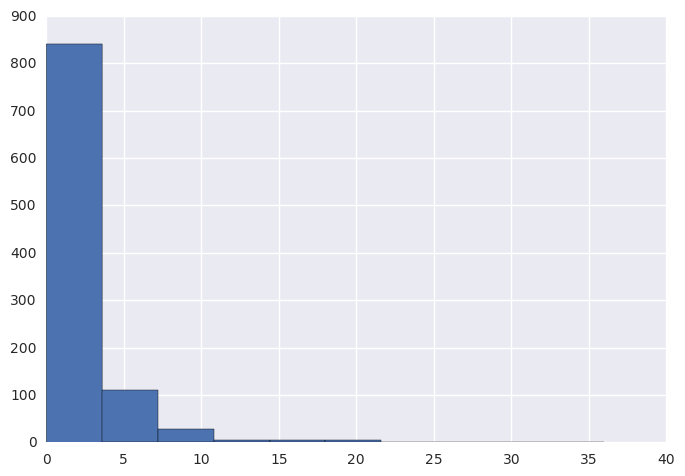

In [261]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

total_lessons_by_account = sum_grouped_items(engagement_by_account,'lessons_completed')

# Summarize the data about lessons 
describe_data(total_lessons_by_account.values())

## Number of Visits in First Week

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


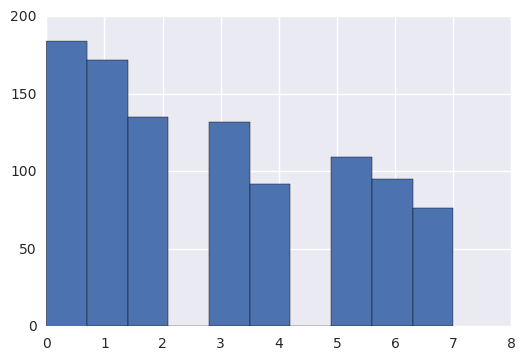

In [285]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.
day_visited_by_account = sum_grouped_items(engagement_by_account,'has_visited')

# Summarize the data about lessons 
describe_data(day_visited_by_account.values())


## Splitting out Passing Students

In [263]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']
pass_subway_project = set()

for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']    

    if ((project in subway_project_lesson_keys) and
            (rating == 'PASSED' or rating == 'DISTINCTION')):
        pass_subway_project.add(submission['account_key'])

len(pass_subway_project)

passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print len(passing_engagement)
print len(non_passing_engagement)


4527
2392


## Comparing the Two Student Groups

In [264]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

passing_engagement_by_account = group_data(passing_engagement,'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement,'account_key')

Total minutes:

For those who passed:
Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645


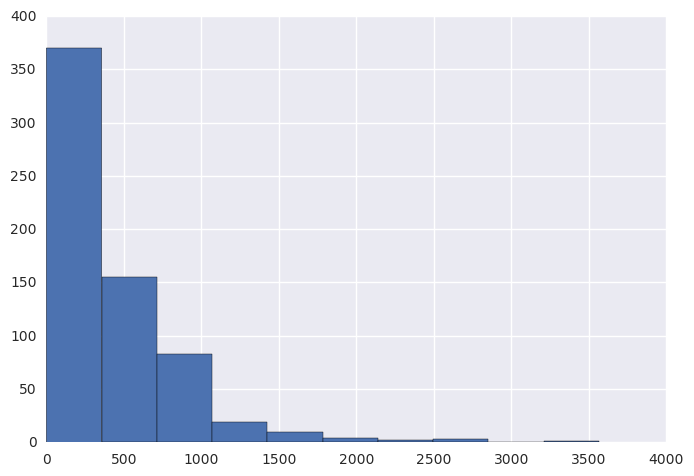

In [265]:
print('Total minutes:')
print('')
## who pass:
print('For those who passed:')
passing_engagement_by_account = group_data(passing_engagement,'account_key')
passing_total_minutes_by_account = sum_grouped_items(passing_engagement_by_account,'total_minutes_visited')
describe_data(passing_total_minutes_by_account.values())



For those who did not pass:
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933


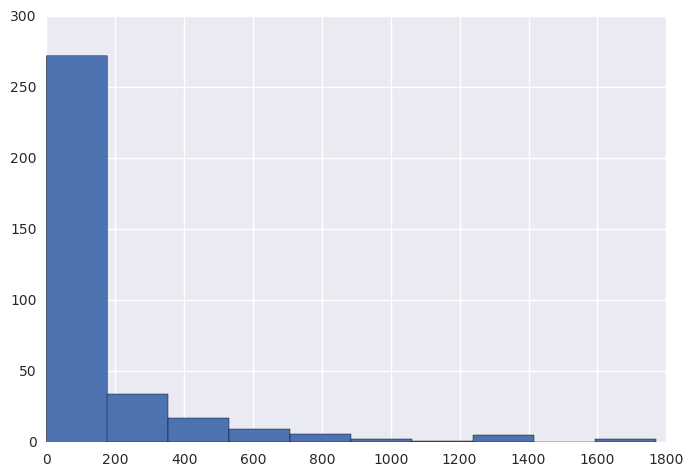

In [266]:
## who did not pass:
print('For those who did not pass:')
non_passing_total_minutes_by_account = sum_grouped_items(non_passing_engagement_by_account,'total_minutes_visited')
describe_data(non_passing_total_minutes_by_account.values())

Lessons completed:

For those who passed:
Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36


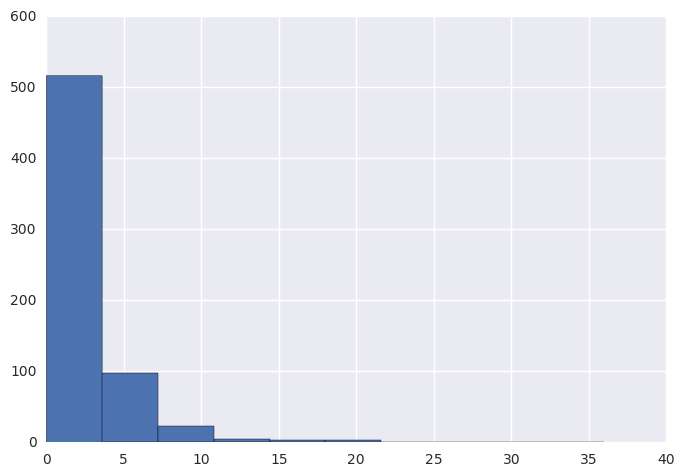

In [267]:
print('Lessons completed:')
print('')
## who pass:
print('For those who passed:')
passing_total_lessons_by_account = sum_grouped_items(passing_engagement_by_account,'lessons_completed')
describe_data(passing_total_lessons_by_account.values())


For those who did not pass:
Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27


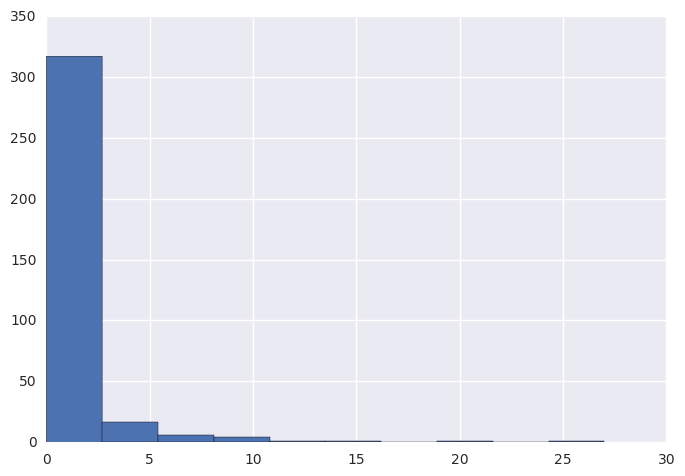

In [268]:
## who did not pass:
print('For those who did not pass:')
non_passing_total_lessons_by_account = sum_grouped_items(non_passing_engagement_by_account,'lessons_completed')
describe_data(non_passing_total_lessons_by_account.values())

Days Visited:

For those who passed:
Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7


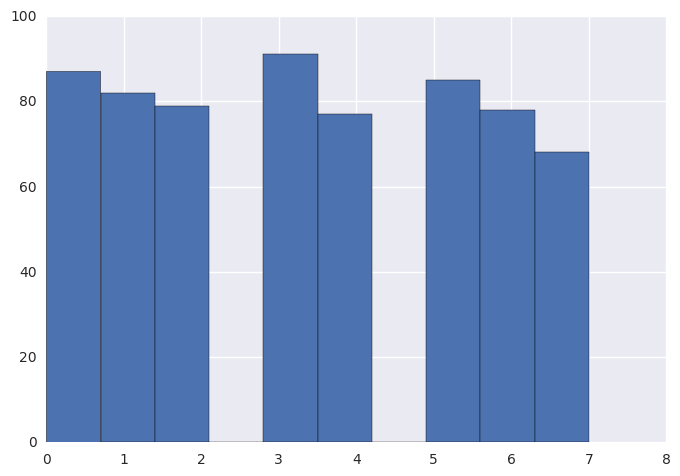

In [269]:
print('Days Visited:')
print('')
## who pass:
print('For those who passed:')
passing_day_visited_by_account = sum_grouped_items(passing_engagement_by_account,'has_visited')
describe_data(passing_day_visited_by_account.values())


For those who did not pass:
Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7


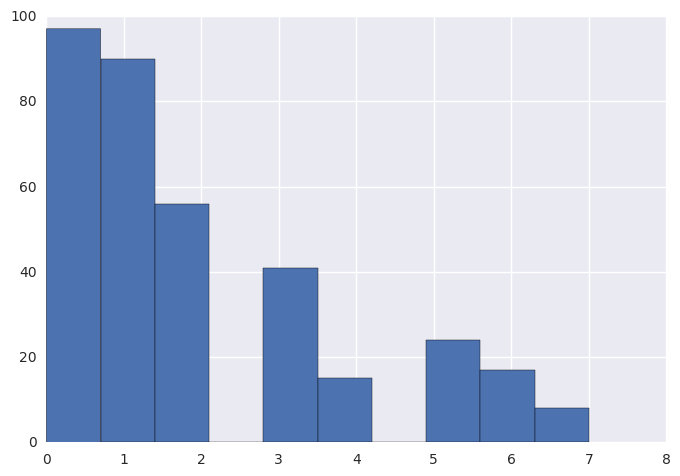

In [270]:
## who did not pass:
print('For those who did not pass:')
non_passing_day_visited_by_account = sum_grouped_items(non_passing_engagement_by_account,'has_visited')
describe_data(non_passing_day_visited_by_account.values())

## Making Histograms

In [271]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

%matplotlib inline
import matplotlib.pyplot as plt


Total minutes:
For those who passed:



(array([ 370.,  155.,   83.,   19.,   10.,    4.,    2.,    3.,    0.,    1.]),
 array([    0.        ,   356.47332645,   712.9466529 ,  1069.41997935,
         1425.8933058 ,  1782.36663225,  2138.8399587 ,  2495.31328515,
         2851.7866116 ,  3208.25993805,  3564.7332645 ]),
 <a list of 10 Patch objects>)

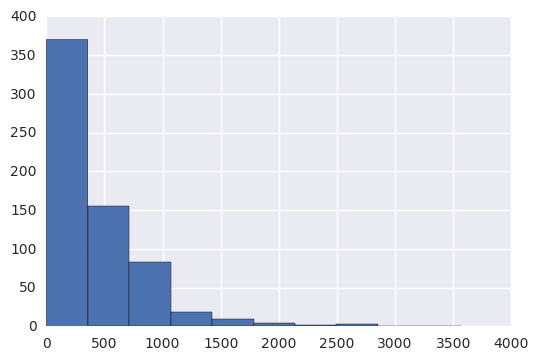

In [272]:
print('Total minutes:')
print('For those who passed:')
print('')
plt.hist(passing_total_minutes_by_account.values())


For those who did not pass:


(array([ 272.,   34.,   17.,    9.,    6.,    2.,    1.,    5.,    0.,    2.]),
 array([    0.        ,   176.85227493,   353.70454987,   530.5568248 ,
          707.40909973,   884.26137467,  1061.1136496 ,  1237.96592453,
         1414.81819947,  1591.6704744 ,  1768.52274933]),
 <a list of 10 Patch objects>)

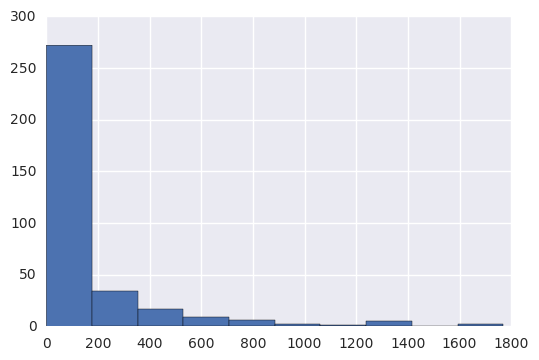

In [273]:
print('')
## who did not pass:
print('For those who did not pass:')
plt.hist(non_passing_total_minutes_by_account.values())

## Improving Plots and Sharing Findings

Lessons completed:

For those who passed:


(array([ 516.,   97.,   23.,    4.,    3.,    3.,    0.,    0.,    0.,    1.]),
 array([  0. ,   3.6,   7.2,  10.8,  14.4,  18. ,  21.6,  25.2,  28.8,
         32.4,  36. ]),
 <a list of 10 Patch objects>)

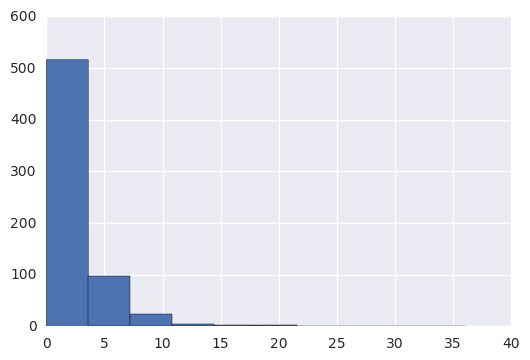

In [274]:
print('Lessons completed:')
print('')
## who pass:
print('For those who passed:')
plt.hist(passing_total_lessons_by_account.values())

For those who did not pass:


(array([ 317.,   17.,    6.,    4.,    1.,    1.,    0.,    1.,    0.,    1.]),
 array([  0. ,   2.7,   5.4,   8.1,  10.8,  13.5,  16.2,  18.9,  21.6,
         24.3,  27. ]),
 <a list of 10 Patch objects>)

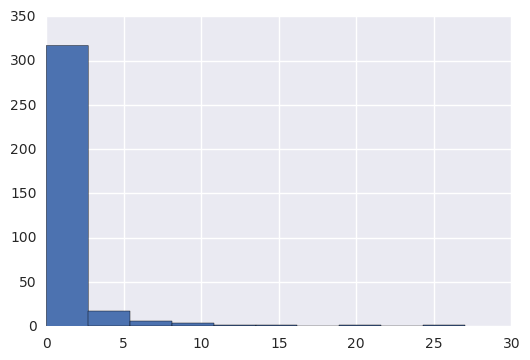

In [275]:
## who did not pass:
print('For those who did not pass:')
plt.hist(non_passing_total_lessons_by_account.values())

Days Visited:

For those who passed:


(array([ 87.,  82.,  79.,   0.,  91.,  77.,   0.,  85.,  78.,  68.]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ]),
 <a list of 10 Patch objects>)

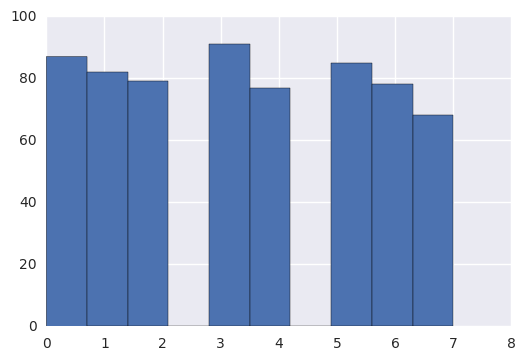

In [276]:
print('Days Visited:')
print('')
## who pass:
print('For those who passed:')
plt.hist(passing_day_visited_by_account.values())


For those who did not pass:


(array([ 97.,  90.,  56.,   0.,  41.,  15.,   0.,  24.,  17.,   8.]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ]),
 <a list of 10 Patch objects>)

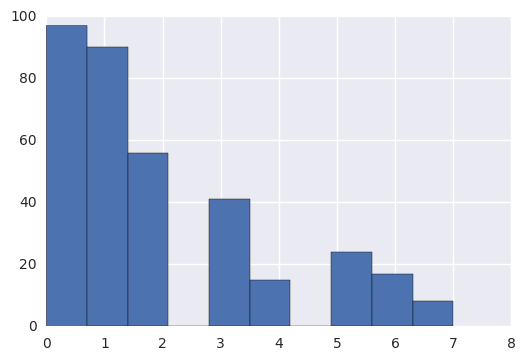

In [277]:
## who did not pass:
print('For those who did not pass:')
plt.hist(non_passing_day_visited_by_account.values())

In [278]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.

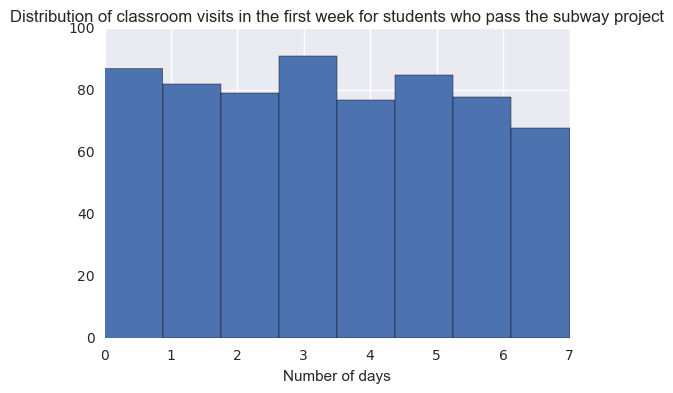

In [291]:
plt.hist(passing_day_visited_by_account.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who pass the subway project')

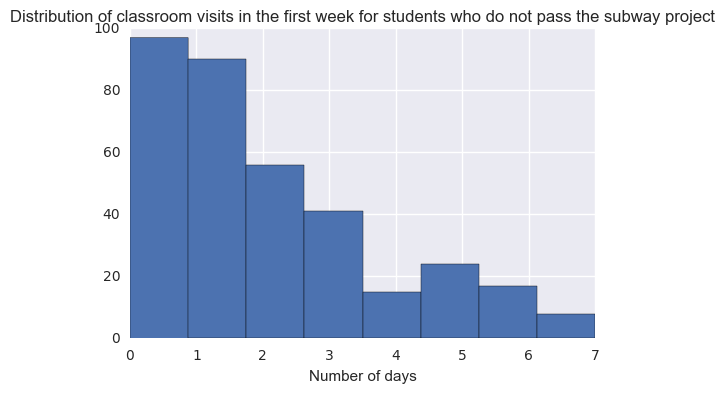

In [292]:
plt.hist(non_passing_day_visited_by_account.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who do not pass the subway project')